# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecure Implementations**

## Jody Spearing

## July 2025

## V3.5

##  **FFNN / MLP New Connection Classification Overview**

**Section 1:** Create Running Environment
*   Install / Import Libraries
*   Validate Runtime
* Load Data: create dataframe = df_0

**Section 2:** Basic Data Exploration on df_0

**Section 3:** Preprocessing on df_1

**Section 4:** Functions

**Section 5:** Model FFNN / MLP Clusters

**Section 6:** Calculate Metrics

**Section 7:** Display Visualizations

**Section 8:** Analyze Results

# **Section 1: Install / Import Libraries**

In [1]:
######################################################################################################################
# Install Necessary Libraries
######################################################################################################################

!apt-get -y install cuda
!pip install pycuda
!pip install cuda-python
#!pip install cudf-cu11
#!pip install --upgrade rmm
!pip install cupy
!pip install torch torchvision torchaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-9 cuda-cccl-12-9 cuda-command-line-tools-12-9
  cuda-compiler-12-9 cuda-crt-12-9 cuda-cudart-12-9 cuda-cudart-dev-12-9
  cuda-cuobjdump-12-9 cuda-cupti-12-9 cuda-cupti-dev-12-9 cuda-cuxxfilt-12-9
  cuda-demo-suite-12-9 cuda-documentation-12-9 cuda-driver-dev-12-9
  cuda-gdb-12-9 cuda-libraries-12-9 cuda-libraries-dev-12-9 cuda-nsight-12-9
  cuda-nsight-compute-12-9 cuda-nsight-systems-12-9 cuda-nvcc-12-9
  cuda-nvdisasm-12-9 cuda-nvml-dev-12-9 cuda-nvprof-12-9 cuda-nvprune-12-9
  cuda-nvrtc-12-9 cuda-nvrtc-dev-12-9 cuda-nvtx-12-9 cuda-nvvm-12-9
  cuda-nvvp-12-9 cuda-opencl-12-9 cuda-profiler-api-12-9 cuda-runtime-12-9
  cuda-sandbox-dev-12-9 cuda-sanitizer-12-9 cuda-toolkit-12-9
  cuda-toolkit-12-9-config-common cuda-tools-12-9 cuda-visual-tools-12-9
  dctrl-tools default-jre default-jre-headless dkms fakeroot fonts-dejav

In [2]:
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00


In [3]:
######################################################################################################################
## Import Python libraries
######################################################################################################################
# Import Base Libraries
import time
import os
import gc
import logging
import torch
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
#import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
import tensorflow as tf
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from sklearn.metrics import roc_curve

#Clustering Metrics Libraries
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix,
    top_k_accuracy_score, silhouette_score, davies_bouldin_score,
    calinski_harabasz_score, adjusted_rand_score,
    normalized_mutual_info_score, fowlkes_mallows_score,
    homogeneity_score, completeness_score, v_measure_score,
    pairwise_distances
)

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


# **Section 1: Validate Runtime**

In [4]:
######################################################################################################################
# check CUDA version
######################################################################################################################
!nvidia-smi

#Use cudf.pandas as a magic
#%load_ext cudf.pandas

Thu May 29 15:16:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             44W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Section 1: Load Data: Original Dataframe = df_0**

In [5]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
import os
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive/GWU/Praxis"

Mounted at /content/gdrive
'A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture Implementations.docx'
 data
 requirements.txt
 results
 Spearing_Jody_Praxis_acronyms.docx
 Spearing_Jody_Praxis_Draft_v04282025v2.docx
 Spearing_Jody_Praxis_Draft_v04302025v2.docx
 Spearing_Jody_Praxis_Draft_v05072025v2.docx
 Spearing_Jody_Praxis_Draft_v05072025v4.docx
 Spearing_Jody_Praxis_Draft_v05102025v2.docx
 Spearing_Jody_Praxis_Draft_v05112025v2.docx
 Spearing_Jody_Praxis_Draft_v05122025v2.docx
 Spearing_Jody_Praxis_Draft_v05142025v2.docx
 Spearing_Jody_Praxis_Draft_v05152025v2.docx
 Spearing_Jody_Praxis_Draft_v05162025v2.docx
 Spearing_Jody_Praxis_Draft_v05192025v2.docx
 Spearing_Jody_Praxis_Draft_v05222025v2.docx
 Spearing_Jody_Praxis_Draft_v05242025v2.docx
 Spearing_Jody_Praxis_Draft_v05252025v2.docx
 Spearing_Jody_Praxis_Draft_v05262025v2.docx
 Spearing_Jody_Praxis_Draft_v05262025v6.docx


In [6]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/'
data = 'Dataset-Unicauca-Version2-87Atts 2.csv'

results_path = '/content/gdrive/My Drive/GWU/Praxis/results/'
results_data = 'GNN_Label_Encoder_Results20250506_184706.csv'
data_file = drive_path + data
results_data_file = results_path + results_data
nRowsRead = 1_000_000


try:
  # load full file
  df_0 = pd.read_csv(data_file)
  results_df = pd.read_csv(results_data_file)

  # Load random Sample
  df_sampled = df_0.sample(n=nRowsRead, random_state=42)

  print(df_0.shape)
  print(df_sampled.shape)
  #print(df.head()) # Print the first few rows to verify

  print(results_df.shape)
  print(results_df.head())

except FileNotFoundError:
  print(f"Error: File not found at {data_file}")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {data_file}. Check file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Error: File not found at /content/gdrive/My Drive/GWU/Praxis/data/Dataset-Unicauca-Version2-87Atts 2.csv


In [7]:
######################################################################################################################
# Write results csv file to drive
######################################################################################################################

def write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_path, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [8]:
df = df_0.copy()
df.shape

(3577296, 87)

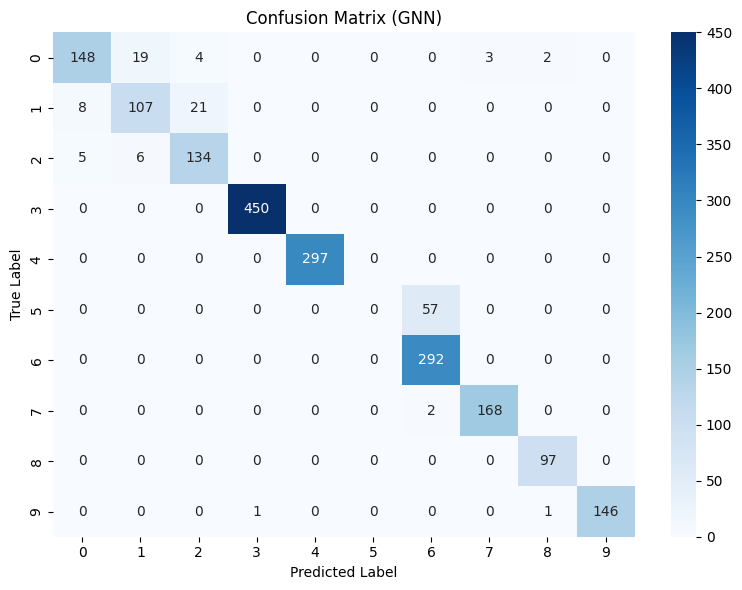

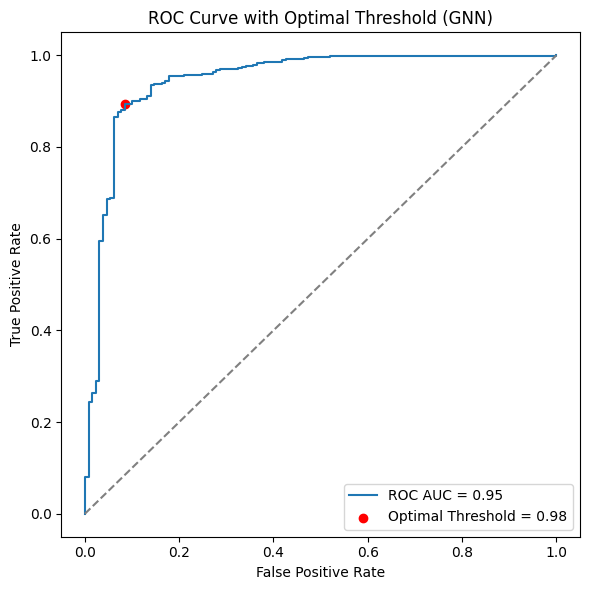

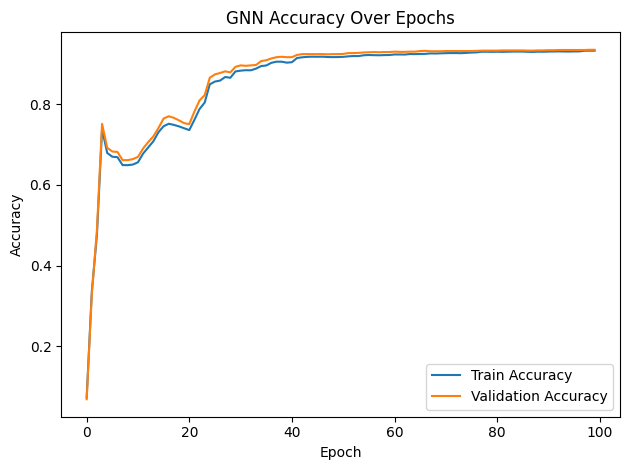

📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-29T15:20:45   GNN  0.934451   0.910701  0.934451   0.92111   

    ROC AUC   PR AUC  Top-3 Accuracy  Avg Entropy  Avg Coherence  \
0  0.996095  0.96307        0.971037     0.106845       0.230546   

   Optimal Threshold  
0           0.984432  


In [9]:
# GNN-based persona prediction model using protocol usage graphs with ROC curve, optimal threshold, and accuracy over epochs

# Prepare protocol usage matrix
df_filtered = df[~df['ProtocolName'].isin(['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP'])]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Create AHC cluster labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Encode data for GNN
node_features = torch.tensor(X.values, dtype=torch.float)
labels = torch.tensor(y_labels.values, dtype=torch.long)

# Build simple similarity-based graph
distance_matrix = cosine_similarity(X)
edge_index = torch.tensor(np.array(np.where(distance_matrix > 0.8)), dtype=torch.long)

# Train/validation split
train_idx, val_idx = train_test_split(np.arange(X.shape[0]), test_size=0.3, random_state=42)
train_mask = torch.zeros(X.shape[0], dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(X.shape[0], dtype=torch.bool)
val_mask[val_idx] = True

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Initialize and train the GCN
model = GCN(in_channels=node_features.shape[1], hidden_channels=64, out_channels=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_acc = []
val_acc = []

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    loss = F.cross_entropy(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        preds_train = out[train_mask].argmax(dim=1).numpy()
        preds_val = out[val_mask].argmax(dim=1).numpy()
        train_acc.append(accuracy_score(labels[train_mask].numpy(), preds_train))
        val_acc.append(accuracy_score(labels[val_mask].numpy(), preds_val))
    model.train()

# Evaluate the model
model.eval()
with torch.no_grad():
    probs = model(node_features, edge_index)
    probs_val = probs[val_mask]
    y_true = labels[val_mask].numpy()
    y_pred = probs_val.argmax(dim=1).numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(F.one_hot(labels[val_mask], num_classes=10).numpy(), probs_val.numpy(), multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(F.one_hot(labels[val_mask], num_classes=10).numpy().ravel(), probs_val.numpy().ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs_val.numpy(), k=3, labels=np.arange(10))
cm = confusion_matrix(y_true, y_pred)

# ROC curve with optimal threshold for binary correctness
confidences = probs_val.max(dim=1).values.numpy()
correct_mask = (y_true == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
roc_auc_bin = auc(fpr, tpr)

# Entropy & Coherence
row_entropies = scipy_entropy(probs_val.T.numpy())
avg_entropy = np.mean(row_entropies)
X_val_df = X.iloc[val_idx].copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Save plots
os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_confmat.png")
plt.close()

# ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_bin:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve with Optimal Threshold (GNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_roc_curve.png")
plt.close()

# Accuracy over epochs
plt.figure()
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("GNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_accuracy_curve.png")
plt.close()

# Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'GNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence,
    'Optimal Threshold': optimal_threshold
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("gnn_evaluation_metrics.csv", index=False)
print("📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'")
print(results_df)


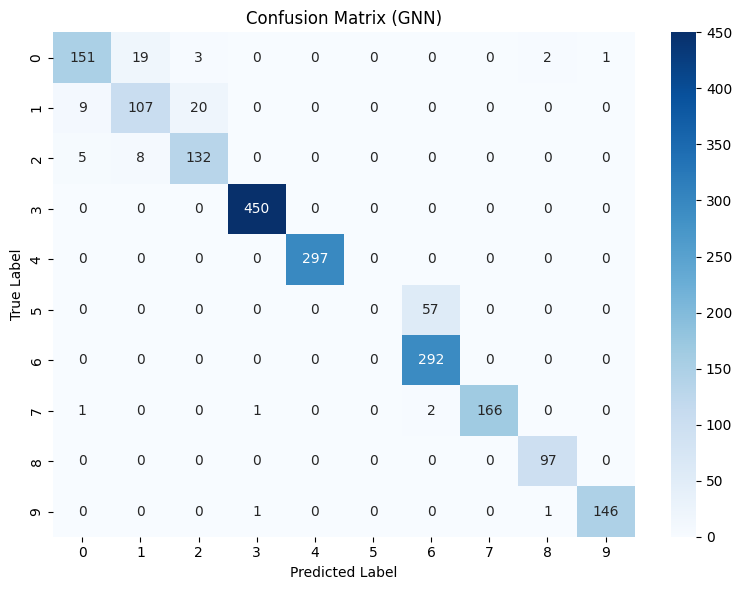

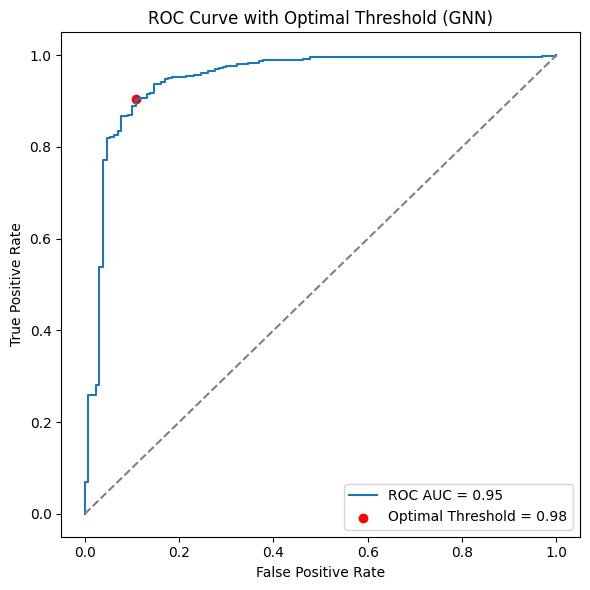

📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-29T15:26:12   GNN  0.933943   0.910156  0.933943  0.920737   

    ROC AUC    PR AUC  Top-3 Accuracy  Avg Entropy  Avg Coherence  \
0  0.993191  0.961606        0.969512     0.094849        0.23095   

   Optimal Threshold  
0           0.978486  


In [10]:
# GNN-based persona prediction model using protocol usage graphs with ROC curve and optimal threshold

# Prepare protocol usage matrix
df_filtered = df[~df['ProtocolName'].isin(['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP'])]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Create AHC cluster labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Encode data for GNN
node_features = torch.tensor(X.values, dtype=torch.float)
labels = torch.tensor(y_labels.values, dtype=torch.long)

# Build simple similarity-based graph
distance_matrix = cosine_similarity(X)
edge_index = torch.tensor(np.array(np.where(distance_matrix > 0.8)), dtype=torch.long)

# Train/validation split
train_idx, val_idx = train_test_split(np.arange(X.shape[0]), test_size=0.3, random_state=42)
train_mask = torch.zeros(X.shape[0], dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(X.shape[0], dtype=torch.bool)
val_mask[val_idx] = True

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Initialize and train the GCN
model = GCN(in_channels=node_features.shape[1], hidden_channels=64, out_channels=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    loss = F.cross_entropy(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    probs = model(node_features, edge_index)
    probs_val = probs[val_mask]
    y_true = labels[val_mask].numpy()
    y_pred = probs_val.argmax(dim=1).numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(F.one_hot(labels[val_mask], num_classes=10).numpy(), probs_val.numpy(), multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(F.one_hot(labels[val_mask], num_classes=10).numpy().ravel(), probs_val.numpy().ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs_val.numpy(), k=3, labels=np.arange(10))
cm = confusion_matrix(y_true, y_pred)

# ROC curve with optimal threshold for binary correctness
confidences = probs_val.max(dim=1).values.numpy()
correct_mask = (y_true == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
roc_auc_bin = auc(fpr, tpr)

# Entropy & Coherence
row_entropies = scipy_entropy(probs_val.T.numpy())
avg_entropy = np.mean(row_entropies)
X_val_df = X.iloc[val_idx].copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Save plots
os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_confmat.png")
plt.close()

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_bin:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve with Optimal Threshold (GNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_roc_curve.png")
plt.close()

# Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'GNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence,
    'Optimal Threshold': optimal_threshold
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("gnn_evaluation_metrics.csv", index=False)
print("📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'")
print(results_df)


In [12]:
# GNN-based persona prediction model using protocol usage graphs with ROC curve, optimal threshold, and accuracy over epochs

# Prepare protocol usage matrix
df_filtered = df[~df['ProtocolName'].isin(['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP'])]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Create AHC cluster labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Encode data for GNN
node_features = torch.tensor(X.values, dtype=torch.float)
labels = torch.tensor(y_labels.values, dtype=torch.long)

# Build simple similarity-based graph
distance_matrix = cosine_similarity(X)
edge_index = torch.tensor(np.array(np.where(distance_matrix > 0.8)), dtype=torch.long)

# Train/validation split
train_idx, val_idx = train_test_split(np.arange(X.shape[0]), test_size=0.3, random_state=42)
print('train= ', train_idx.shape)
print('val= ', val_idx.shape)
train_mask = torch.zeros(X.shape[0], dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(X.shape[0], dtype=torch.bool)
val_mask[val_idx] = True

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Initialize and train the GCN
model = GCN(in_channels=node_features.shape[1], hidden_channels=64, out_channels=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_acc = []
val_acc = []

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    loss = F.cross_entropy(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        preds_train = out[train_mask].argmax(dim=1).numpy()
        preds_val = out[val_mask].argmax(dim=1).numpy()
        train_acc.append(accuracy_score(labels[train_mask].numpy(), preds_train))
        val_acc.append(accuracy_score(labels[val_mask].numpy(), preds_val))
    model.train()

# Evaluate the model
model.eval()
with torch.no_grad():
    probs = model(node_features, edge_index)
    probs_val = probs[val_mask]
    y_true = labels[val_mask].numpy()
    y_pred = probs_val.argmax(dim=1).numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(F.one_hot(labels[val_mask], num_classes=10).numpy(), probs_val.numpy(), multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(F.one_hot(labels[val_mask], num_classes=10).numpy().ravel(), probs_val.numpy().ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs_val.numpy(), k=3, labels=np.arange(10))
cm = confusion_matrix(y_true, y_pred)

# ROC curve with optimal threshold for binary correctness
confidences = probs_val.max(dim=1).values.numpy()
correct_mask = (y_true == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
roc_auc_bin = auc(fpr, tpr)

# Entropy & Coherence
row_entropies = scipy_entropy(probs_val.T.numpy())
avg_entropy = np.mean(row_entropies)
X_val_df = X.iloc[val_idx].copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Save plots
os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("plots/gnn_confmat.png")
plt.close()

# ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_bin:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve with Optimal Threshold (GNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.savefig("plots/gnn_roc_curve.png")
plt.close()

# Accuracy over epochs
plt.figure()
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("GNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig("plots/gnn_accuracy_curve.png")
plt.close()

# Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'GNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence,
    'Optimal Threshold': optimal_threshold
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("gnn_evaluation_metrics.csv", index=False)
print("📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'")
print(results_df)


train=  (4590,)
val=  (1968,)
📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-29T15:36:54   GNN  0.933435   0.909551  0.933435  0.920078   

   ROC AUC    PR AUC  Top-3 Accuracy  Avg Entropy  Avg Coherence  \
0  0.99552  0.964386        0.970528     0.104122       0.230685   

   Optimal Threshold  
0           0.993571  


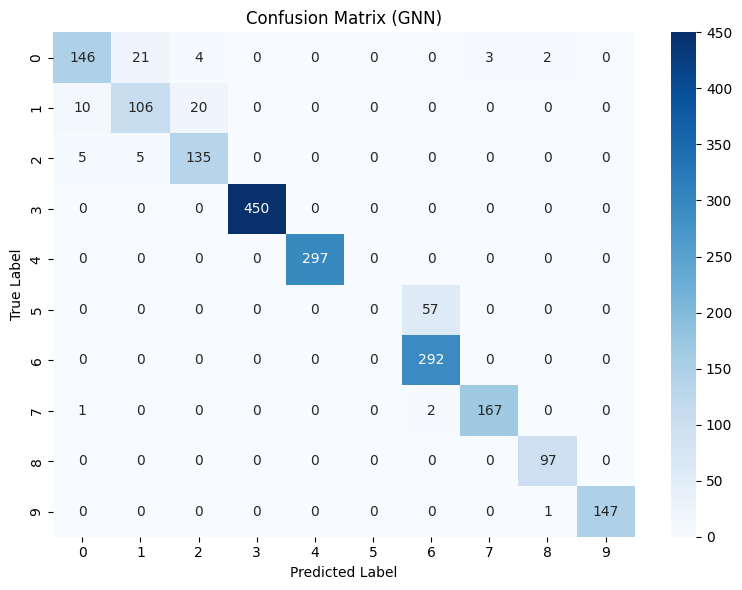

📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-14T14:16:12   GNN  0.933435   0.909527  0.933435  0.920041   

    ROC AUC    PR AUC  Top-3 Accuracy  Avg Entropy  Avg Coherence  
0  0.995546  0.963769        0.969004      0.11322       0.230518  


In [ ]:
# GNN-based persona prediction model using protocol usage graphs

# Prepare protocol usage matrix
df_filtered = df[~df['ProtocolName'].isin(['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP'])]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Create AHC cluster labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Encode data for GNN
node_features = torch.tensor(X.values, dtype=torch.float)
labels = torch.tensor(y_labels.values, dtype=torch.long)

# Build simple similarity-based graph
distance_matrix = cosine_similarity(X)
edge_index = torch.tensor(np.array(np.where(distance_matrix > 0.8)), dtype=torch.long)

# Train/validation split
train_idx, val_idx = train_test_split(np.arange(X.shape[0]), test_size=0.3, random_state=42)
train_mask = torch.zeros(X.shape[0], dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(X.shape[0], dtype=torch.bool)
val_mask[val_idx] = True

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Initialize and train the GCN
model = GCN(in_channels=node_features.shape[1], hidden_channels=64, out_channels=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    loss = F.cross_entropy(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    probs = model(node_features, edge_index)
    probs_val = probs[val_mask]
    y_true = labels[val_mask].numpy()
    y_pred = probs_val.argmax(dim=1).numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(F.one_hot(labels[val_mask], num_classes=10).numpy(), probs_val.numpy(), multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(F.one_hot(labels[val_mask], num_classes=10).numpy().ravel(), probs_val.numpy().ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs_val.numpy(), k=3, labels=np.arange(10))
cm = confusion_matrix(y_true, y_pred)

# Entropy & Coherence
row_entropies = scipy_entropy(probs_val.T.numpy())
avg_entropy = np.mean(row_entropies)
X_val_df = X.iloc[val_idx].copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Save plots
os.makedirs("plots", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.savefig("plots/gnn_confmat.png")
plt.close()

# Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'GNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("gnn_evaluation_metrics.csv", index=False)
print("📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'")
print(results_df)


In [ ]:
# GNN-based persona prediction model with extended evaluation metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix,
    top_k_accuracy_score, adjusted_rand_score
)
from sklearn.preprocessing import LabelEncoder
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity

# Prepare protocol usage matrix
df_filtered = df[~df['ProtocolName'].isin(['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP'])]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Create AHC cluster labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Encode data for GNN
node_features = torch.tensor(X.values, dtype=torch.float)
labels = torch.tensor(y_labels.values, dtype=torch.long)

# Build simple similarity-based graph
distance_matrix = cosine_similarity(X)
edge_index = torch.tensor(np.array(np.where(distance_matrix > 0.8)), dtype=torch.long)

# Train/validation split
train_idx, val_idx = train_test_split(np.arange(X.shape[0]), test_size=0.3, random_state=42)
train_mask = torch.zeros(X.shape[0], dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(X.shape[0], dtype=torch.bool)
val_mask[val_idx] = True

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Initialize and train the GCN
model = GCN(in_channels=node_features.shape[1], hidden_channels=64, out_channels=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    loss = F.cross_entropy(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    probs = model(node_features, edge_index)
    probs_val = probs[val_mask]
    y_true = labels[val_mask].numpy()
    y_pred = probs_val.argmax(dim=1).numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(F.one_hot(labels[val_mask], num_classes=10).numpy(), probs_val.numpy(), multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(F.one_hot(labels[val_mask], num_classes=10).numpy().ravel(), probs_val.numpy().ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs_val.numpy(), k=3, labels=np.arange(10))
cm = confusion_matrix(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Binary classification interpretation from confidence
confidences = probs_val.max(dim=1).values.numpy()
correct_mask = (y_true == y_pred).astype(int)
threshold = 0.5
binary_preds = (confidences >= threshold).astype(int)
cm_bin = confusion_matrix(correct_mask, binary_preds)
fp = cm_bin[0, 1]
tn = cm_bin[0, 0]
fn = cm_bin[1, 0]
tp = cm_bin[1, 1]
fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

# Entropy & Coherence
row_entropies = scipy_entropy(probs_val.T.numpy())
avg_entropy = np.mean(row_entropies)
X_val_df = X.iloc[val_idx].copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Save plots
os.makedirs("plots", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("plots/gnn_confmat.png")
plt.close()

# Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'GNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'ARI': ari,
    'TPR': tpr_rate,
    'FPR': fpr_rate,
    'TNR': tnr_rate,
    'FNR': fnr_rate,
    'TP': tp,
    'FP': fp,
    'TN': tn,
    'FN': fn,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("gnn_evaluation_metrics.csv", index=False)
print("📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'")
print(results_df)


📁 GNN evaluation results saved to 'gnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-14T15:43:40   GNN  0.891768   0.820843  0.891768  0.851387   

    ROC AUC   PR AUC  Top-3 Accuracy       ARI       TPR       FPR       TNR  \
0  0.909385  0.86874        0.901423  0.894821  0.997721  0.732394  0.267606   

        FNR    TP   FP  TN  FN  Avg Entropy  Avg Coherence  
0  0.002279  1751  156  57   4     0.086096       0.229395  
